In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

In [2]:

car_df=pd.read_csv('new auto.csv')
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,2009,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2009,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2009,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2009,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2009,1,ford torino


In [3]:
car_df.shape

(398, 9)

### here in the above columns most potential column that we need to predict is mpg(mileage)



## verifying the correlation of the variables above

In [4]:
car_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,2012.577889,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,2.336376,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,2009.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,2010.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,2013.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,2014.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,2017.000000,3.000000


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Observation:
### As you can see above the hp value are not integer values they are objects so need to check the values

In [6]:
car_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
car_df['horsepower']=car_df['horsepower'].replace('?',np.nan)

In [8]:
# here the ? mark vales are replaced with the nan values so will check how many records got replaced
car_df['horsepower'].isnull().sum()

6

In [9]:
car_df['horsepower']=car_df['horsepower'].astype('float64')

In [10]:
car_df['horsepower'].dtype

dtype('float64')

In [11]:
# fill the nan values with median values
car_df['horsepower']=car_df['horsepower'].fillna(car_df['horsepower'].median())

In [12]:
car_df['horsepower'].isnull().sum()

0

In [13]:
corr_table=car_df.corr()
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.598049,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.370526,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.387924,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.420723,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.325565,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.290921,0.205873
model year,0.598049,-0.370526,-0.387924,-0.420723,-0.325565,0.290921,1.000000,0.187167
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.187167,1.000000


## Lets visualize the above values in the heat map

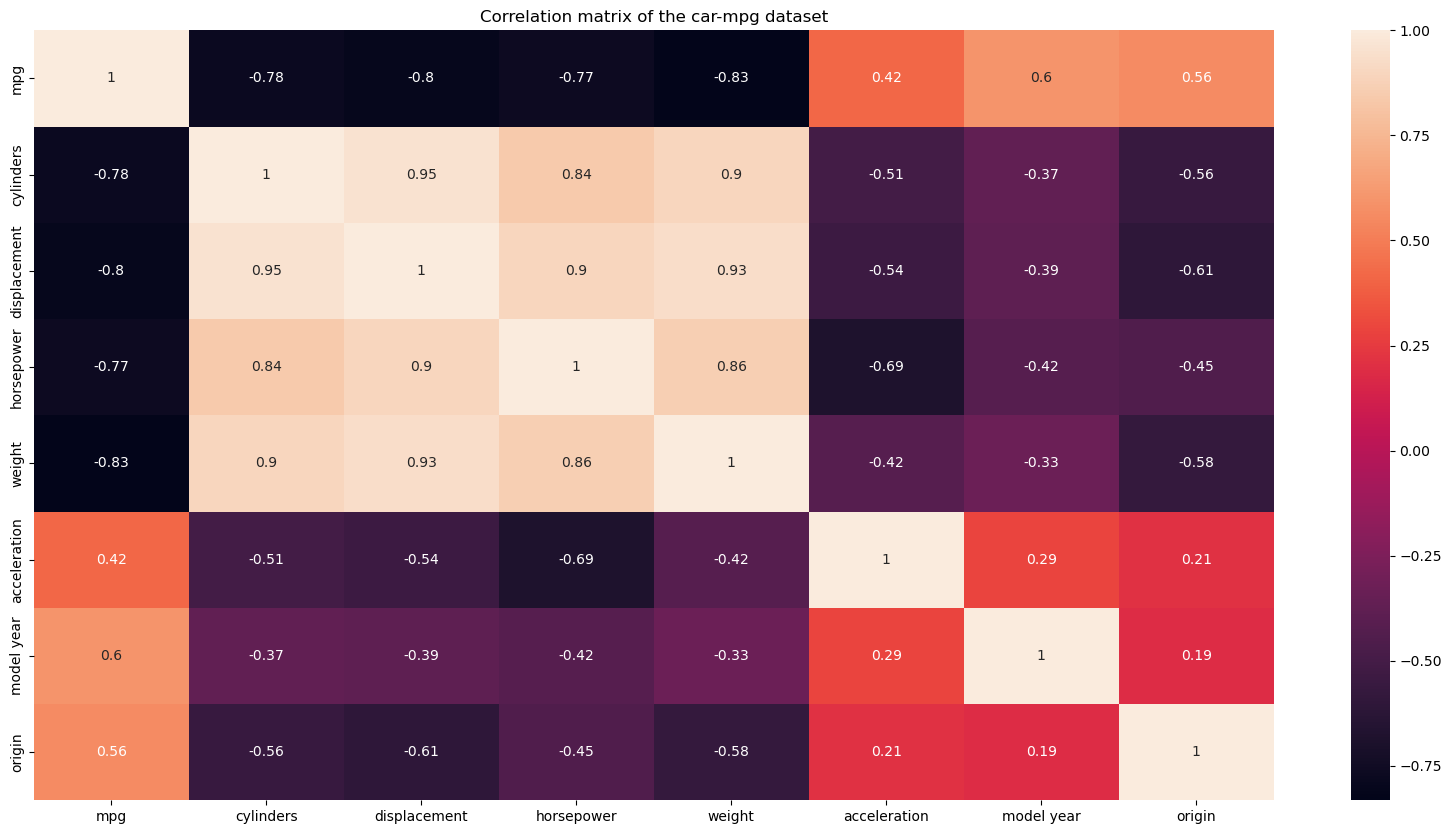

In [14]:
plt.figure(figsize=(20,10))
g=sns.heatmap(corr_table,annot=True)
g.set(title='Correlation matrix of the car-mpg dataset')
plt.show()          
           

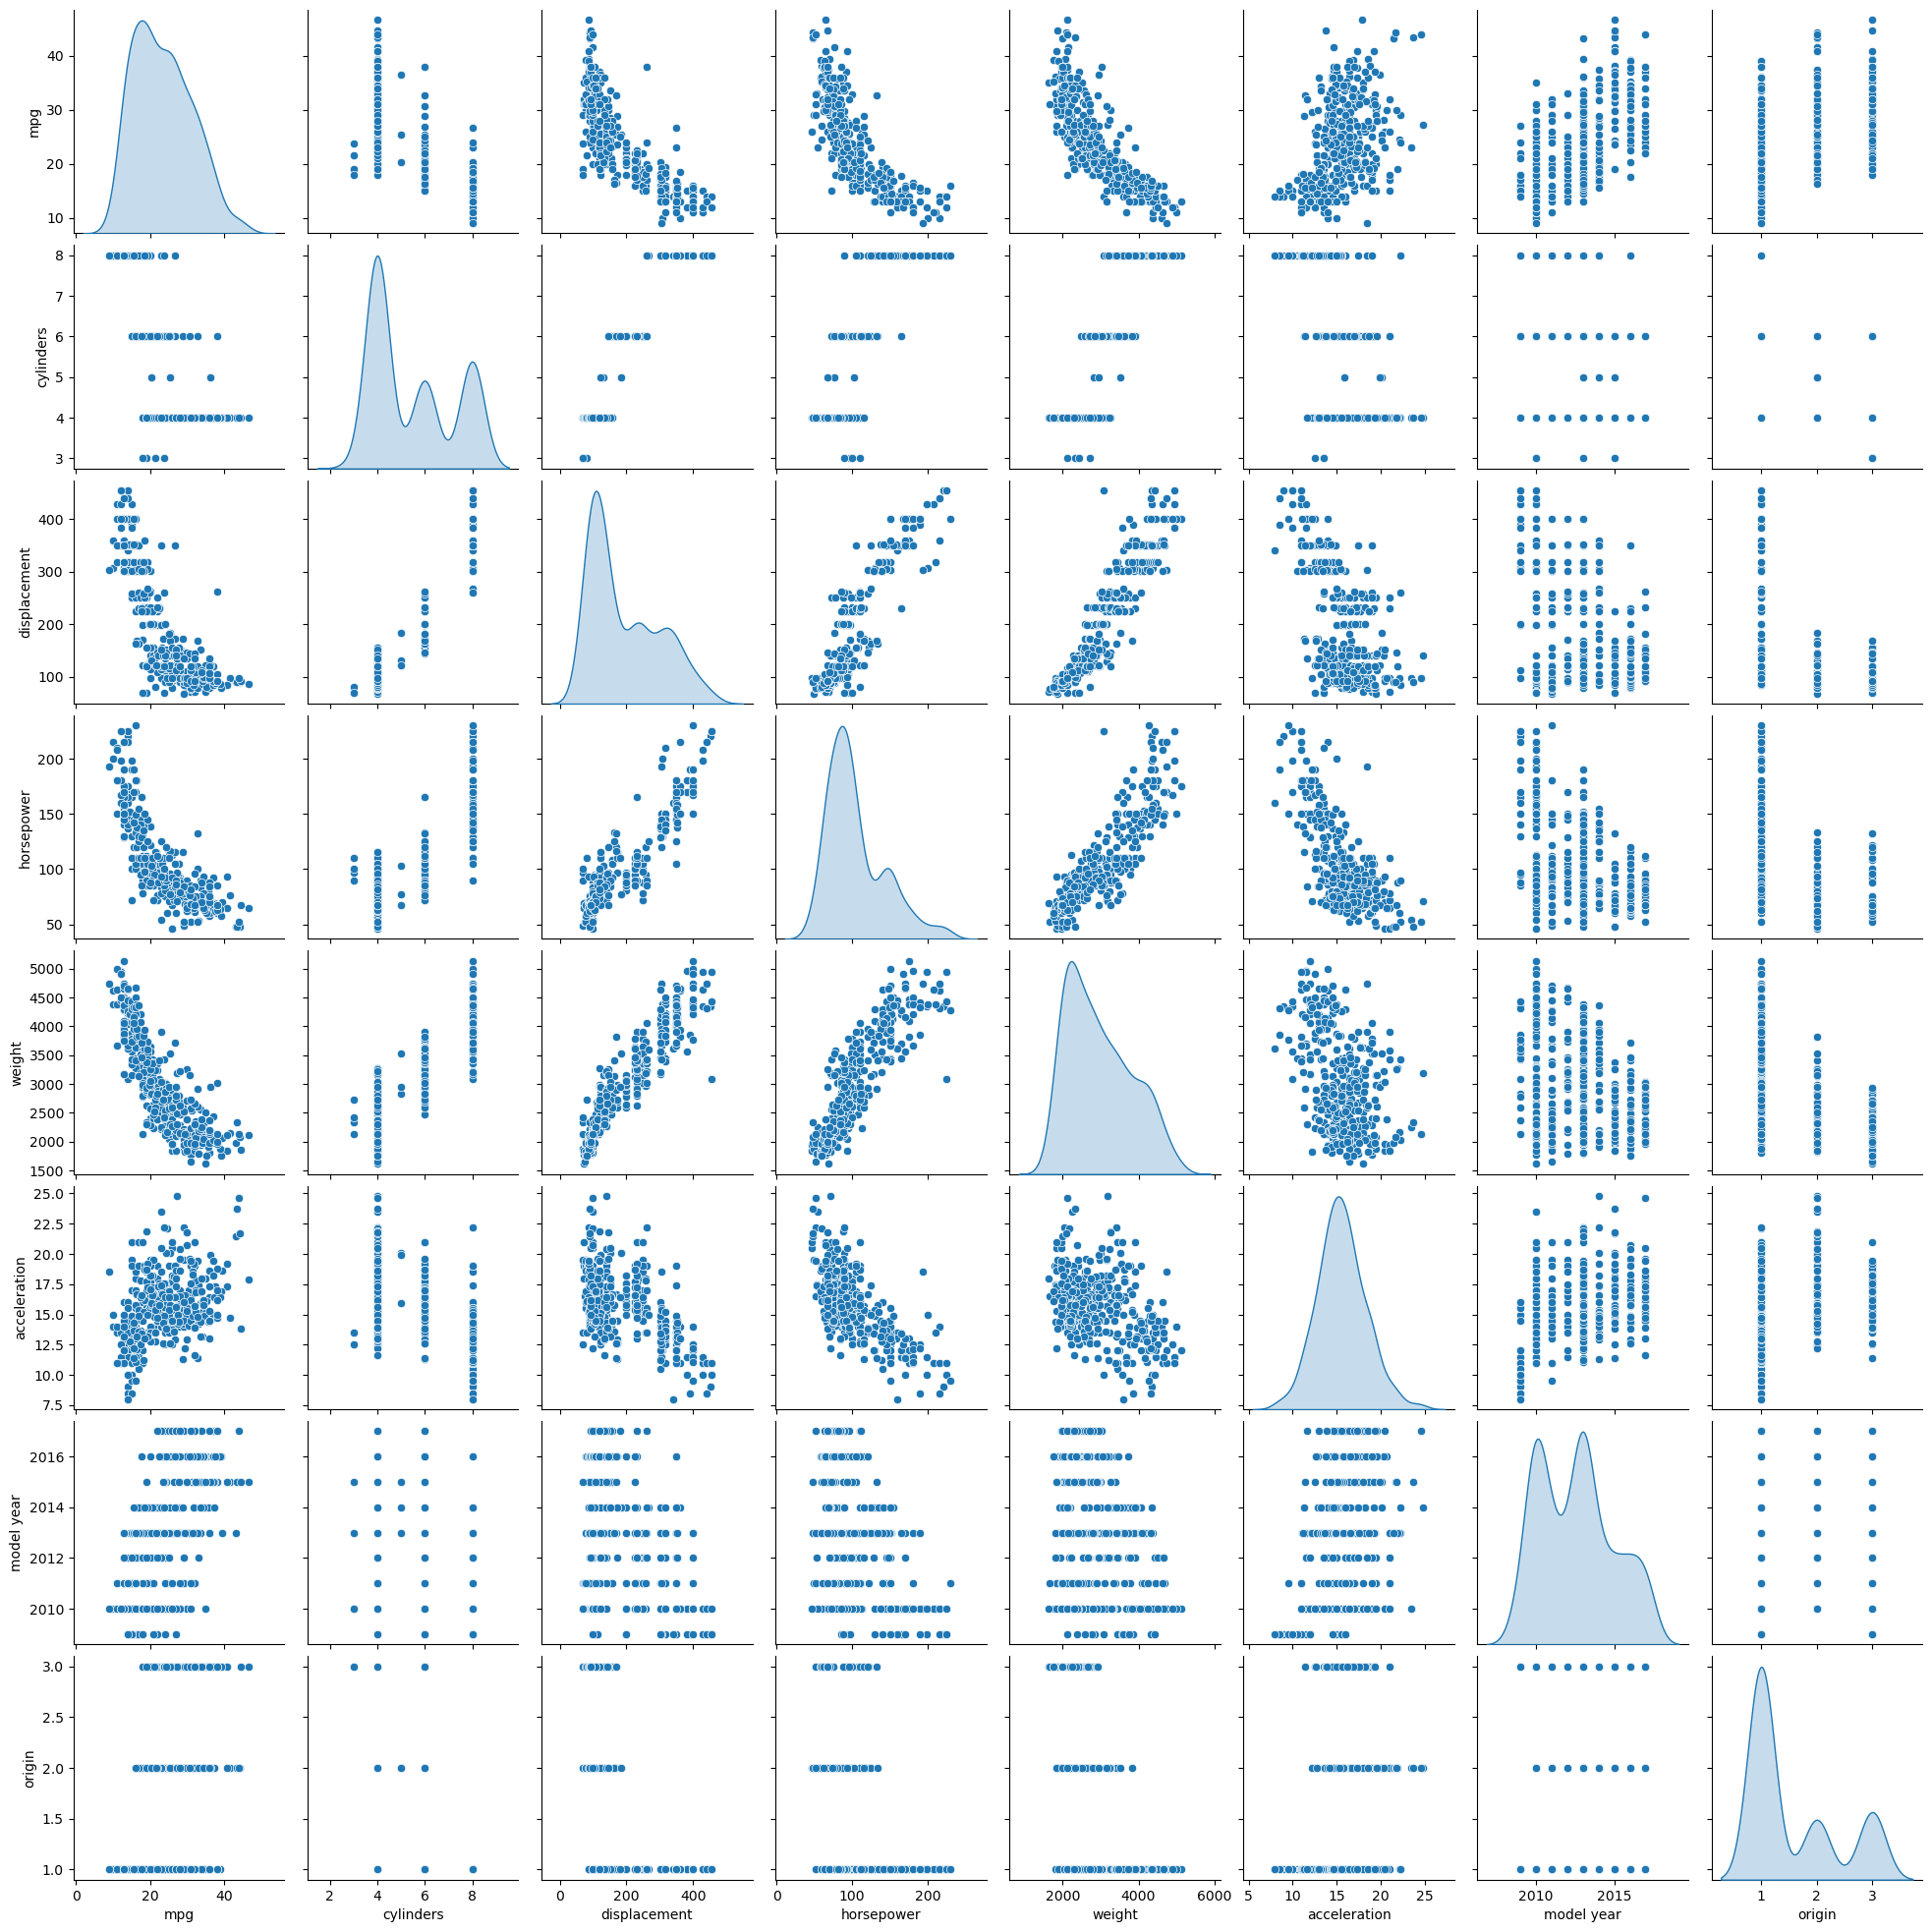

In [15]:
sns.pairplot(car_df,diag_kind='kde')
plt.show()

In [16]:
car_df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [17]:
# for this we need to import statsmodels as shown below 
import statsmodels.formula.api as smf

In [18]:
test1=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',car_df).fit()

In [19]:
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     166.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.03e-104
Time:                        09:34:58   Log-Likelihood:                -1130.6
No. Observations:                 398   AIC:                             2275.
Df Residuals:                     391   BIC:                             2303.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.9725      2.699     15.920      0.000      37.666      48.279
cylinders       -0.5325      0.403     -1.320      0.188      -1.326       0.261
displacement     0.0113      0.009      1.201      0.230      -0.007       0.030
horsepower      -0.0563      0.016     -3.421      0.001      -0.089      -0.024
weight          -0.0050      0.001     -6.337      0.000      -0.007      -0.003
acceleration    -0.0118      0.121     -0.097      0.922      -0.250       0.227
origin           1.4539      0.346      4.206      0.000       0.774       2.133
==============================================================================
Omnibus:                       32.446   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.885
Skew:                           0.623   Prob(JB):                     4.87e-10
Kurtosis:                       4.018   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
car_df=car_df.drop('acceleration',axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin,car name
0,18.0,8,307.0,130.0,3504,2009,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,2009,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,2009,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,2009,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,2009,1,ford torino


In [21]:
# i am removing the car name variable as i has nothing to to here
car_df=car_df.drop('car name',axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin
0,18.0,8,307.0,130.0,3504,2009,1
1,15.0,8,350.0,165.0,3693,2009,1
2,18.0,8,318.0,150.0,3436,2009,1
3,16.0,8,304.0,150.0,3433,2009,1
4,17.0,8,302.0,140.0,3449,2009,1


In [22]:
# importing the requried libaries for regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics


In [23]:
y=car_df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [24]:
x=car_df.iloc[:,1:]
x.head()

,cylinders,displacement,horsepower,weight,model year,origin
0,8,307.0,130.0,3504,2009,1
1,8,350.0,165.0,3693,2009,1
2,8,318.0,150.0,3436,2009,1
3,8,304.0,150.0,3433,2009,1
4,8,302.0,140.0,3449,2009,1


In [25]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
rmse=[]
for train,test in kf.split(x,y):
    LR=LinearRegression()
    #print(train)
    xtrain=x.iloc[train]
    xtest=x.iloc[test]
    ytrain=y.iloc[train]
    ytest=y.iloc[test]
    LR.fit(xtrain,ytrain)
    ypredict=LR.predict(xtest)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(ytest,ypredict)))
    
    #r_value=LR.score(ytest,ypredict)
print('Rmse error in the first test is :%1.3f'%(rmse[0]))
print('Rmse error in the second test is:%1.3f'%(rmse[1]))
print('Rmse error in the third test is :%1.3f'%(rmse[2]))
print('Rmse error in the fourth test is:%1.3f'%(rmse[3]))
print('Rmse error in the fifth test is :%1.3f'%(rmse[4]))

print('Average mean rmse error i.e Bias error is: %1.3f'%(np.mean(rmse)))

print('Variance of rmse error i.e Variance error is: %1.3f'%(np.var(rmse,ddof=1)))

#print('R2 value of the model is : %1.3f'%(r_value))
    
    
    

Rmse error in the first test is :2.681
Rmse error in the second test is:3.434
Rmse error in the third test is :3.706
Rmse error in the fourth test is:3.385
Rmse error in the fifth test is :3.381
Average mean rmse error i.e Bias error is: 3.317
Variance of rmse error i.e Variance error is: 0.145


In [31]:
## predicting the mileage values for new values 
# cylinder=8,displacement=206,horsepower=200,weight=1900,modelyear=70,origin=2
values=[[8,206,200,1900,2009,2]]
new_mileage=LR.predict(values)
print('predicted new mileage for above values is %1.3f'%new_mileage)

predicted new mileage for above values is 23.640


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
import pickle
pickle_out = open("LR.pkl","wb")
pickle.dump(LR, pickle_out)
pickle_out.close()